In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/colabIP/Images/cell-bright.bmp')
gimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
N=18
dimh=np.int32(gimg.shape[0]/N)
dimw=np.int32(gimg.shape[1]/N)

#dh_rest =np.int32(gimg) % dimh
#dw_rest =np.int32(gimg) % dimw
#meanimg =np.zeros((N,N))
#outimg=np.zeros((gimg.shape[0],gimg.shape[1]))

dh_rest = gimg.shape[0] % dimh
dw_rest = gimg.shape[1] % dimw
meanimg = np.zeros((N, N))
outimg = np.zeros((gimg.shape[0], gimg.shape[1]))

In [ ]:
def mean(img,dimh,dimw,h,w):
  count=1
  sum=0
  avg=0

  for i in range(h,h+dimh):
    for j in range(w,w+dimw):
      sum=sum+img[i][j]
      count=count+1
  avg=sum/count
  return avg

In [ ]:
for h in range(0, gimg.shape[0] - dh_rest, dimh):
    for w in range(0, gimg.shape[1] - dw_rest, dimw):
        meanimg[h // dimh, w // dimw] = mean(gimg, dimh, dimw, h, w)


In [ ]:
for h in range(0,gimg.shape[0]-dh_rest):
  for w in range(0,gimg.shape[1]-dw_rest):
    if(gimg[h,w]>meanimg[np.int32(h/dimh),np.int32(w/dimw)]):
      outimg[h,w]=255
    else:
      outimg[h,w]=0

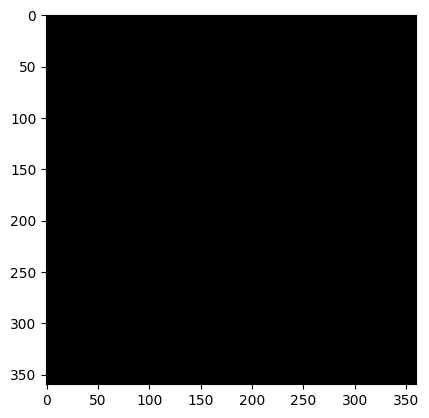

In [ ]:
plt.imshow(outimg,cmap='gray')